In [1]:
from canvas import *
from generators import *
import matplotlib.pyplot as plt
import numpy as np
import os
from trajectory_visualizer import TrajectoryVisualizer
import torch

In [2]:
def sample_points(trajectory, k=8):
    # samples k points evenly spaced along trajectory (with interpolation)
    # ignores t=0 since we always assume stroke starts at (0.0, 0.0, 0.0)
    res = []
    n = len(trajectory) - 1
    trajectory = trajectory / np.array([128, 128, -30]) + np.array([-1, -1, 0])
    
    distances = [0]
    total_distance = 0
    for i in range(n-1):
        p0 = trajectory[i]
        p1 = trajectory[i+1]
        total_distance += np.linalg.norm((p0 - p1)[:2])
        distances.append(total_distance)
    
    def sample_at(t):
        assert 0 <= t and t <= 1
        for i in range(n-1):
            d0 = distances[i] / total_distance
            d1 = distances[i+1] / total_distance
            if d1 >= t:
                k = (t-d0) / (d1-d0)
                return trajectory[i]*(1-k) + trajectory[i+1]*k
    
    res = np.array([sample_at(t/k) for t in range(1, k+1)])
    return res

In [3]:
tv = TrajectoryVisualizer(-1, 1, -1, 1, 0, 1)

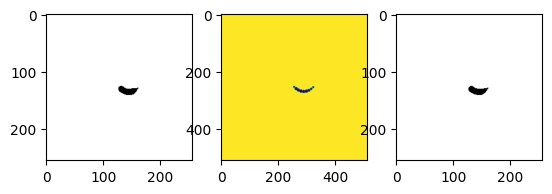

In [4]:
gen = CubicBezierGenerator()
stroke, trajectory = gen.gen()
_, axs = plt.subplots(1,3)
axs[0].imshow(stroke)
trajectory = torch.Tensor(sample_points(trajectory, 8))
axs[1].imshow(tv.visualize_trajectory(trajectory))
axs[2].imshow(tv.render_trajectory(trajectory))

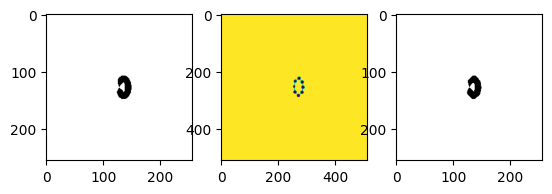

In [10]:
gen = CircleGenerator()
stroke, trajectory = gen.gen()
_, axs = plt.subplots(1,3)
axs[0].imshow(stroke)
trajectory = torch.Tensor(sample_points(trajectory, 8))
axs[1].imshow(tv.visualize_trajectory(trajectory))
axs[2].imshow(tv.render_trajectory(trajectory))

In [11]:
gens = [CubicBezierGenerator(), CircleGenerator()]
strokes = []
trajectories = []
for gen in gens:
    for i in range(200):
        s, t = gen.gen()
        #strokes.append(s[:,:,0]/255)
        traj = sample_points(t, 8)
        trajectories.append(traj)
        strokes.append(tv.render_trajectory(torch.Tensor(traj)))
strokes = np.stack(strokes)
trajectories = np.stack(trajectories)

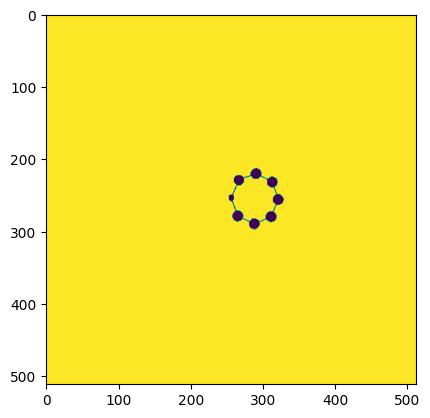

In [12]:
idx = 243
plt.imshow(strokes[idx])
plt.imshow(tv.visualize_trajectory(torch.Tensor(trajectories[idx])))

In [13]:
os.makedirs("simulated_stroke_data", exist_ok=True)
with open("simulated_stroke_data/strokes.npy", "wb") as f:
    np.save(f, strokes)
with open("simulated_stroke_data/trajectories.npy", "wb") as f:
    np.save(f, trajectories)